## 1、关于torchvision

`torchvision` 是`PyTorch`中专门用来处理图像的库。这个包中有四个大类。

- torchvision.datasets
- torchvision.models
- torchvision.transforms

## 2、torchvision.datasets

内置数据集：https://pytorch.org/vision/0.8/datasets.html

案例：

In [ ]:
import torchvision

dataset = torchvision.datasets.MNIST(root='./mnist/', train=True,transform=torchvision.transforms.ToTensor(),download=True)

## 3、torchvision.models

In [ ]:
!mkdir resnet50
!wget https://www.flyai.com/m/resnet50_ibn_a-d9d0bb7b.pth

内置模型：https://pytorch.org/vision/0.8/models.html

模型加速下载链接：https://www.flyai.com/models

案例：

### 1-只用模型不用参数

In [ ]:
import torchvision.models as models
resnet50 = models.resnet50(progress=True)

### 2-使用模型和参数

In [ ]:
import torchvision.models as models
resnet50 = models.resnet50(pretrained=True,progress=True)

### 3-加载EfficientNet网络

参考：https://blog.csdn.net/qq_38410428/article/details/95074279

In [ ]:
!pip install efficientnet_pytorch
!wget https://www.flyai.com/m/adv-efficientnet-b3-cdd7c0f4.pth
    
from efficientnet_pytorch import EfficientNet
# 只加载模型不用参数
model = EfficientNet.from_name('efficientnet-b3')

In [ ]:
# 加载网络和参数
model = EfficientNet.from_pretrained('efficientnet-b0')

In [ ]:
# 查看最后几行输出中的 out_features 为多少分类
print(model)

In [ ]:
import torch.nn as nn

# 修改最后的分类
feature = model._fc.in_features
model._fc = nn.Linear(in_features=feature,out_features=45,bias=True)

In [ ]:
# 再次检查最后几行输出中的 out_features 是否为设定类别数
print(model)

## 4、torchvision.transforms

transforms方法：https://pytorch.org/vision/0.8/transforms.html

案例：

In [ ]:
from torchvision import transforms

transform_data = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])

dataset = torchvision.datasets.MNIST(root='./mnist/', train=True,transform=transform_data,download=True)

## 5、实战

参考：
1. https://www.cnblogs.com/wj-1314/p/9842719.html
2. https://blog.csdn.net/qq_36560894/article/details/104506272
3. https://blog.csdn.net/qq_36560894/article/details/104923543

In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [50]:
train_transform = transforms.Compose( 
    [transforms.ToTensor(), 
     transforms.Lambda(lambda x: x.repeat(3,1,1)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] 
)
test_transform = transforms.Compose( 
    [transforms.ToTensor(), 
     transforms.Lambda(lambda x: x.repeat(3,1,1)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] 
)

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=0)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


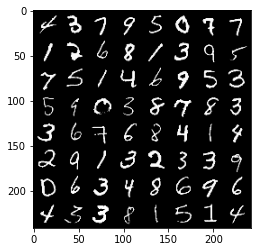

tensor([4, 3, 7, 9, 5, 0, 7, 7, 1, 2, 6, 8, 1, 3, 9, 5, 7, 5, 1, 4, 6, 9, 5, 3,
        5, 9, 0, 3, 8, 7, 8, 3, 3, 6, 7, 6, 8, 4, 1, 4, 2, 9, 1, 3, 2, 3, 3, 9,
        0, 6, 3, 4, 8, 6, 9, 6, 4, 3, 3, 8, 1, 5, 1, 4])


In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 如果是RGB图像请注释掉 transforms.Lambda(lambda x: x.repeat(3,1,1)), 否则保留该语句
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(labels)

In [33]:
import torchvision.models as models
model = models.resnet18(pretrained=True,progress=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /output/.torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [34]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [36]:
# 修改最后的分类
fc_features = model.fc.in_features 
model.fc = nn.Linear(fc_features, 10)

参考：https://blog.csdn.net/weixin_36670529/article/details/105910572

In [37]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=2e-4)

In [47]:
import time

# 保存每个epoch后的Accuracy Loss Val_Accuracy
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
Accuracy = []
Loss = []
Val_Accuracy = []
BEST_VAL_ACC = 0.
# 训练
since = time.time()
for epoch in range(10):
    train_loss = 0.
    train_accuracy = 0.
    run_accuracy = 0.
    run_loss =0.
    total = 0.
    model.train()
    for i,data in enumerate(trainloader,0):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)  
        # 经典四步
        optimizer.zero_grad()
        outs = model(images)
        loss = criterion(outs, labels)
        loss.backward()
        optimizer.step()
        # 输出状态
        total += labels.size(0)
        run_loss += loss.item()
        _,prediction = torch.max(outs,1)
        run_accuracy += (prediction == labels).sum().item()
        if i % 20 == 19:
            print('epoch {},iter {},train accuracy: {:.4f}%   loss:  {:.4f}'.format(epoch, i+1, 100*run_accuracy/(labels.size(0)*20), run_loss/20))
            train_accuracy += run_accuracy
            train_loss += run_loss
            run_accuracy, run_loss = 0., 0.
    Loss.append(train_loss/total)
    Accuracy.append(100*train_accuracy/total)
    # 可视化训练过程
    fig1, ax1 = plt.subplots(figsize=(11, 8))
    ax1.plot(range(0, epoch+1, 1), Accuracy)
    ax1.set_title("Average trainset accuracy vs epochs")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Avg. train. accuracy")
    plt.savefig('Train_accuracy_vs_epochs.png')
    plt.clf()
    plt.close()
    
    fig2, ax2 = plt.subplots(figsize=(11, 8))
    ax2.plot(range(epoch+1), Loss)
    ax2.set_title("Average trainset loss vs epochs")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Current loss")
    plt.savefig('loss_vs_epochs.png')

    plt.clf()
    plt.close()
    # 验证
    acc = 0.
    model.eval()
    print('waitting for Val...')
    with torch.no_grad():
        accuracy = 0.
        total =0
        for data in valloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            out = model(images)
            _, prediction = torch.max(out, 1)
            total += labels.size(0)
            accuracy += (prediction == labels).sum().item()
            acc = 100.*accuracy/total
    print('epoch {}  The ValSet accuracy is {:.4f}% \n'.format(epoch, acc))
    Val_Accuracy.append(acc)
    if acc > BEST_VAL_ACC:
        print('Find Better Model and Saving it...')
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(model.state_dict(), './checkpoint/VGG19_Cats_Dogs_hc.pth')
        BEST_VAL_ACC = acc
        print('Saved!')
    
    fig3, ax3 = plt.subplots(figsize=(11, 8))

    ax3.plot(range(epoch+1),Val_Accuracy )
    ax3.set_title("Average Val accuracy vs epochs")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("Current Val accuracy")

    plt.savefig('val_accuracy_vs_epoch.png')
    plt.close()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed%60))
    print('Now the best val Acc is {:.4f}%'.format(BEST_VAL_ACC))

epoch 0,iter 20,train accuracy: 97.1094%   loss:  0.1031
epoch 0,iter 40,train accuracy: 96.9531%   loss:  0.0887
epoch 0,iter 60,train accuracy: 98.0469%   loss:  0.0593
epoch 0,iter 80,train accuracy: 98.5156%   loss:  0.0527
epoch 0,iter 100,train accuracy: 98.0469%   loss:  0.0599
epoch 0,iter 120,train accuracy: 97.7344%   loss:  0.0806
epoch 0,iter 140,train accuracy: 98.2812%   loss:  0.0551
epoch 0,iter 160,train accuracy: 98.4375%   loss:  0.0525
epoch 0,iter 180,train accuracy: 98.7500%   loss:  0.0434
epoch 0,iter 200,train accuracy: 97.8125%   loss:  0.0853
epoch 0,iter 220,train accuracy: 98.5156%   loss:  0.0625
epoch 0,iter 240,train accuracy: 98.4375%   loss:  0.0604
epoch 0,iter 260,train accuracy: 98.5156%   loss:  0.0565
epoch 0,iter 280,train accuracy: 97.7344%   loss:  0.0744
epoch 0,iter 300,train accuracy: 98.5156%   loss:  0.0483
epoch 0,iter 320,train accuracy: 98.3594%   loss:  0.0494
epoch 0,iter 340,train accuracy: 97.5781%   loss:  0.0934
epoch 0,iter 360,t

KeyboardInterrupt: 

In [48]:
PATH = './resnet18.pth'
torch.save(model.state_dict(), PATH)

In [54]:
# 评估结果1
correct = 0.
total = 0.
with torch.no_grad():  # 不需要计算梯度
    for data in testloader:
        images, labels = data
        out = model(images)
        _,prediction = torch.max(out, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct/total))


Accuracy of the network on the 10000 test images: 98 %
